In [9]:
import matplotlib.pyplot as plt
import numpy as np
from util import simulate_finger_force
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [20]:
rng = np.random.default_rng(0)
Nf, Nd = 5, 3  # 5 fingers, 3 channels/finger
N = Nf * Nd  # N channels
T = 20  # trial duration
d = 5  # addition low-dimensional patterns

w_f, w_p, w_b = .8, .1, .5
single_finger = np.eye(N)  # first we have single finger "synergies"
add_patterns = rng.standard_normal((N, d))  # then some additional patterns
flexCh = np.arange(0, N, Nd, dtype=int)  # then the flexor bias
flexBias = np.zeros(N)
flexBias[flexCh] = 1
A_hc = np.c_[.8 * single_finger, w_p * add_patterns, .1 * flexBias]  # basis vectors for health participants
A_st = np.c_[.3 * single_finger, w_p * add_patterns, .6 * flexBias]  # basis vectors for stroke patients

enslavement = np.array([.1, .1, .1, .4, .4])  # set enslavement

I = np.eye(N)  # recruitment of basis vectors in each condition
B_f = I.reshape(Nf, Nd, N)
B_p = rng.standard_normal((Nf, Nd, d))
B_b = np.ones((Nf, 3)) # np.c_[np.ones((Nf, 1)), np.zeros((Nf, 2))]
B = np.c_[B_f, B_p, B_b[:, :, None]]

# simulate trials
F_hc, fgrs_hc, dirs_hc = simulate_finger_force(A_hc, B, enslavement, noise=.0, n_trials=1000)  # healthy control
F_st, fgrs_st, dirs_st = simulate_finger_force(A_st, B, enslavement, noise=.0, n_trials=1000)  # stroke patient

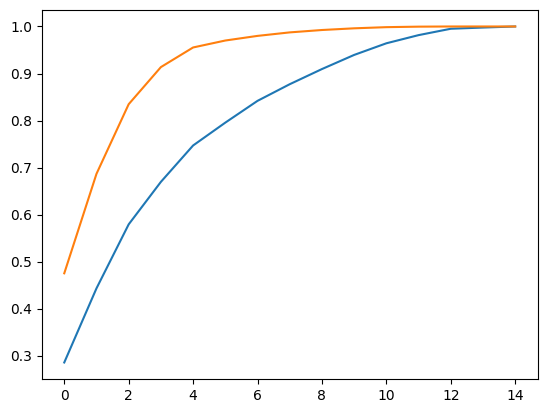

In [28]:
F_concat_hc = F_hc.reshape(-1, N)
F_concat_st = F_st.reshape(-1, N)

scaler = StandardScaler()
F_hc_norm = scaler.fit_transform(F_concat_hc)
F_st_norm = scaler.fit_transform(F_concat_st)

# do PCA
pca = PCA()
pca.fit(F_hc_norm)
evr_hc = pca.explained_variance_ratio_
pca.fit(F_st_norm)
evr_st = pca.explained_variance_ratio_

plt.plot(np.cumsum(evr_hc))
plt.plot(np.cumsum(evr_st))
plt.show()

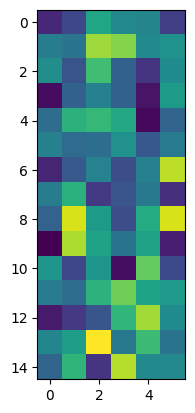

In [31]:
U, S, Vt = np.linalg.svd(F_concat_st, full_matrices=False)
d = 6
Bb = Vt[:d].T  # basis vectors for low-dimensional manifold

In [35]:
target = np.array([1, 0])
pos = np.array([0, 0])
kp = 1.

err = target - pos                 # (2,)
v_des = kp * err

v_des

array([1., 0.])